サービスを利用しているユーザー群を何らかの目的でクラスタリングする場合、教師なしでのクラスタリングを実施することが多く、Kmeansでのクラスタリング例をirisデータで実施しています。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# ダミーデータとしてirisを利用

iris = sns.load_dataset('iris')

print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


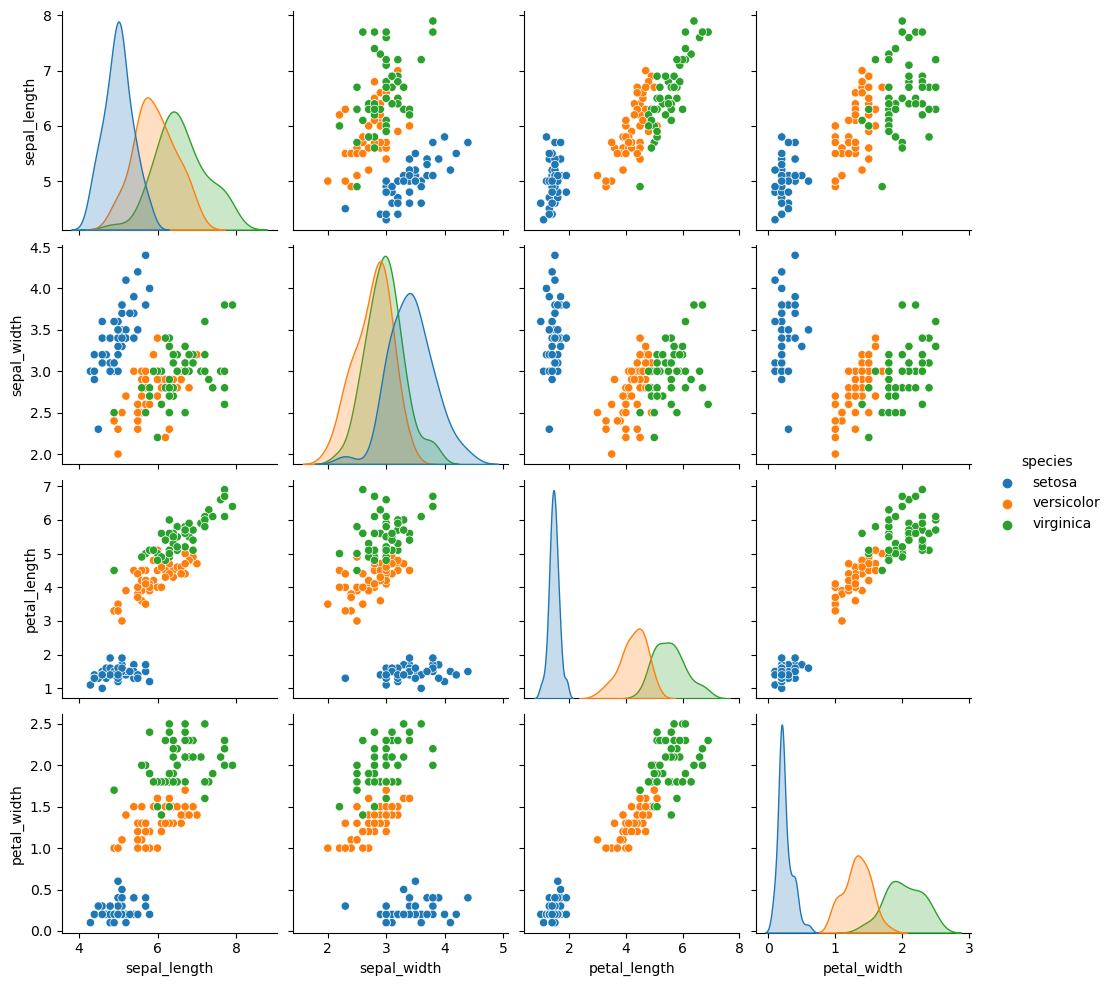

In [3]:
#正解データの可視化
sns.pairplot(iris, hue= 'species')

In [4]:
# 欠損値の確認 ->無し
iris.isnull().all()


sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [5]:
#正解ラベルの削除
iris_nospecies = iris.drop(['species'],axis=1)

#各種値の分散を揃えるため標準化

scaler = StandardScaler()

iris_nospecies_scaled = scaler.fit_transform(iris_nospecies)

df = pd.DataFrame(iris_nospecies_scaled)

df.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


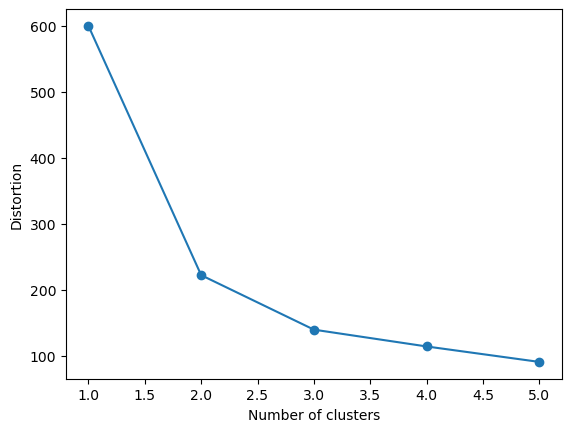

In [6]:
#エルボー法にてクラスタ数を検索

distortions = []

for i  in range(1,6):                # 1~5クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df) # クラスタリングの計算を実行
    distortions.append(km.inertia_)  

plt.plot(range(1,6),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [7]:
# エルボー法で得られた結果から3クラスタで分類する

km3 = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)

# 3クラスタで分類
cluster_result_3 = km3.fit_predict(df)


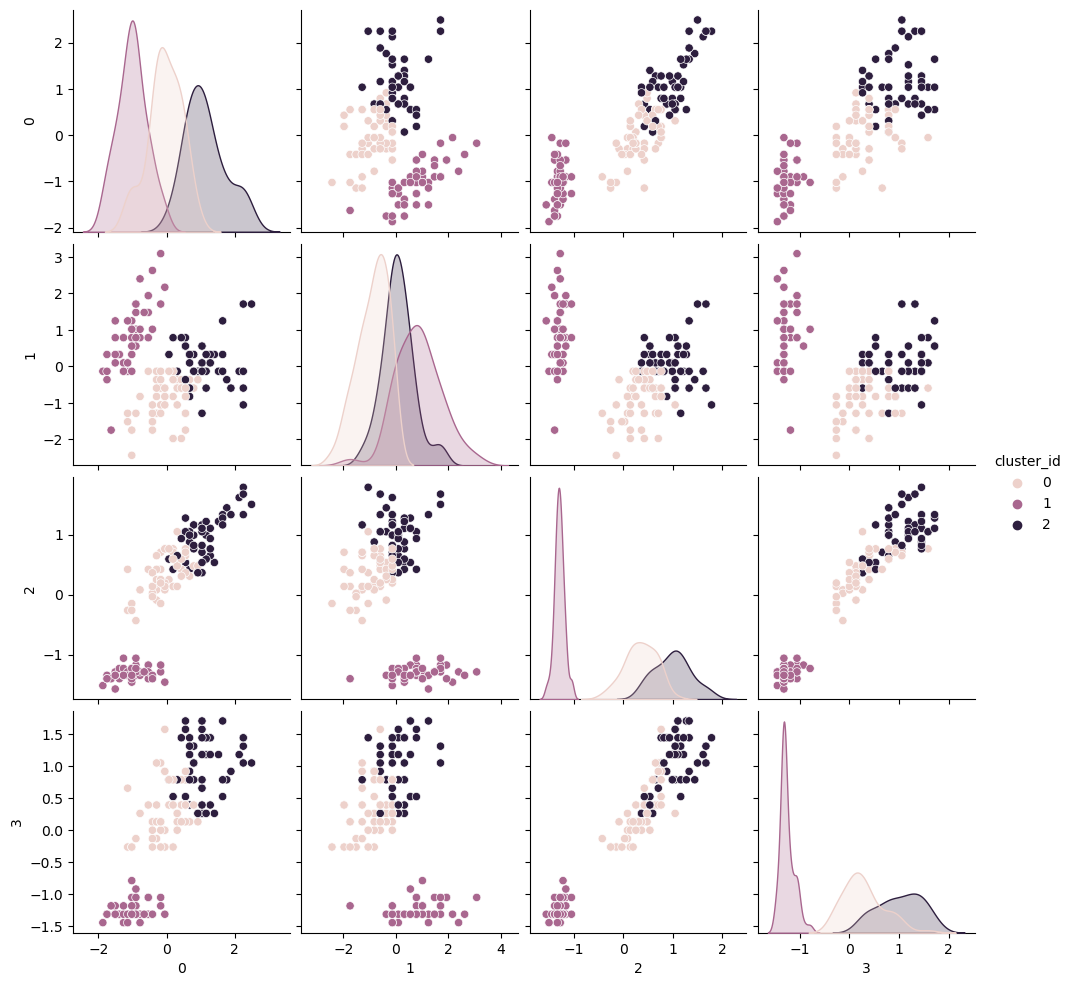

In [8]:
# 分類結果を可視化
df_cluster_result_3 = df.copy()
df_cluster_result_3['cluster_id'] = cluster_result_3

sns.pairplot(df_cluster_result_3, hue= 'cluster_id')

In [9]:
# 精度検証のため、最も近いと思われるクラスタidを手動で置換
df_cluster_result_3_named = df_cluster_result_3.copy()


df_cluster_result_3_named = df_cluster_result_3_named.replace({'cluster_id': {0: "versicolor", 1: "setosa", 2: "virginica"}})

df_cluster_result_3_named.head()

,0,1,2,3,cluster_id
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


In [10]:
#正解と予測データの抽出
y_true = iris['species']
y_pred = df_cluster_result_3_named['cluster_id']

In [11]:
#精度確認として今回は混同行列、Accuracy、Recallを見る

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

cm = confusion_matrix(y_true, y_pred, labels=['setosa','versicolor','virginica'] )

print("confusion matrix\n setosa versicolor virginica \n", cm )
print("accuracy_score:", accuracy_score(y_true, y_pred))
print("f1_score:", f1_score(y_true, y_pred,average='macro'))

confusion matrix
 setosa versicolor virginica 
 [[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]
accuracy_score: 0.8333333333333334
f1_score: 0.8331831982117239
